# Part II - Ford Go Bike System
## by Wilkins Nduva

## Investigation Overview

> Customer user type trips take a longer duration compared to subscriber user type.

> We have more male member bike users compared to the female

> 91% of the users were subscribers

> 90% bike users didn't use the bike for their entire trip

## Dataset Overview

> The dataset comes from over 183,000 trips in a bike-sharing system that serves the larger San Francisco Bay region. The data characteristics include duration (seconds), as well as DateTime, client type, gender, and a few more factors.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bike = pd.read_csv('Fordgobike.csv')
bike.sample(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
122912,646,2019-02-11 10:10:12.2980,2019-02-11 10:20:59.0930,317.0,San Salvador St at 9th St,37.333955,-121.877349,296.0,5th St at Virginia St,37.325998,-121.877120,3842,Subscriber,1996.0,Female,Yes
165094,474,2019-02-05 07:45:20.8660,2019-02-05 07:53:15.3720,269.0,Telegraph Ave at Carleton St,37.862320,-122.258801,245.0,Downtown Berkeley BART,37.870139,-122.268422,2673,Subscriber,1996.0,Male,No


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

In [3]:
#data cleaning and wrangling
bike = bike.dropna()

#change start_time and end_time data type to date
bike.start_time = pd.to_datetime(bike.start_time)
bike.end_time = pd.to_datetime(bike.end_time)

#change member birth year to int data type
bike.member_birth_year = bike.member_birth_year.astype('int64')
bike.member_birth_year.info()

# calculate members age, I have used 2020 since it was the year the data was collected
bike['Age'] = 2020 - bike['member_birth_year']

#drop values where age is greater than 80 years
bike = bike.query("Age <= 80")

# Column on only the start_time month 
bike['start_time_month'] = bike['start_time'].dt.strftime('%B')

# Column on only the start_time day of the week  
bike['start_time_day'] = bike['start_time'].dt.strftime('%A')

# Start time hour
bike['start_time_hour'] = bike['start_time'].dt.hour
bike['start_time_hour'] = bike.start_time_hour.astype(str)

# Duration in seconds to duration in minutes
bike['duration_min'] = bike['duration_sec']/60

#round of the duration in minutes
bike['duration_min'] = bike.duration_min.apply(np.ceil)

<class 'pandas.core.series.Series'>
Int64Index: 174952 entries, 0 to 183411
Series name: member_birth_year
Non-Null Count   Dtype
--------------   -----
174952 non-null  int64
dtypes: int64(1)
memory usage: 2.7 MB


In [4]:
bike.sample()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Age,start_time_month,start_time_day,start_time_hour,duration_min
180585,475,2019-02-01 10:38:04.475,2019-02-01 10:45:59.673,206.0,College Ave at Bryant Ave,37.838127,-122.251271,212.0,Mosswood Park,37.824893,...,4918,Subscriber,1984,Male,No,36,February,Friday,10,8.0


In [5]:
#function to plot a bar chat
def plot_bar(bike, xlabel, ylabel, title):
    bike.plot(kind ='bar', color = 'crimson', figsize=(8,8))
    plt.xlabel(xlabel, color = 'darkblue', fontsize = 10)
    plt.ylabel(ylabel, color = 'red', fontsize = 10)
    plt.title(title, fontweight = 'bold')
    plt.show()

## 1. Day of the week with most bike trips

> The busiest day where the majority of the bikes are used is Thursday with 33689 member bike users.


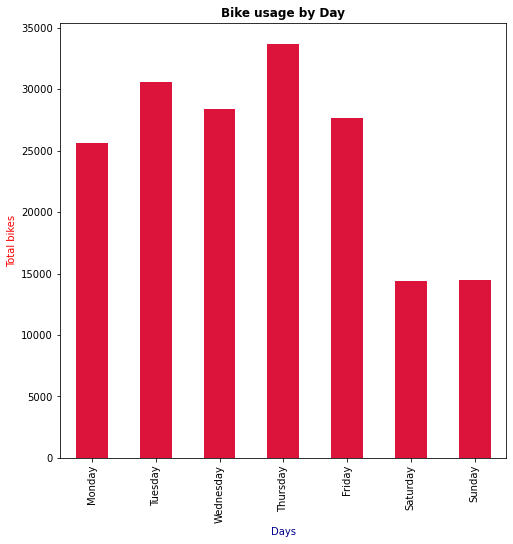

In [6]:
#Busiest day of the week by start_time
bike_day = bike['start_time_day'].value_counts().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plot_bar(bike_day, 'Days','Total bikes','Bike usage by Day');

## 2. Bike usage by time of the day

> Here we can clearly see that most trips are made at 0800hrs and in the evening at 1700hrs

In [7]:
# ordinal numerical arrangment
ordinal_hour = {'start_time_hour': [str(i) for i in range(0,24)]}
for hour in ordinal_hour:
    ordered_hour = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_hour[hour])
    bike[hour] = bike[hour].astype(ordered_hour)

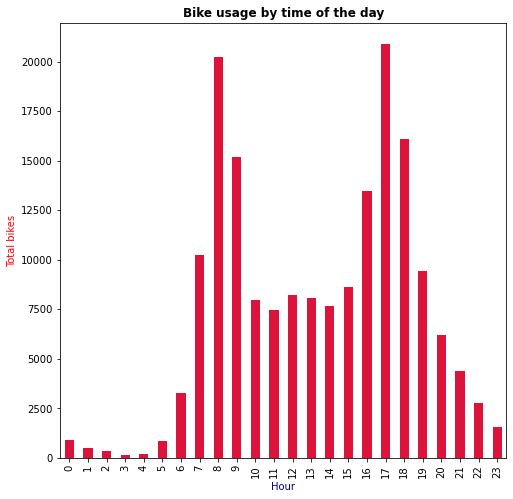

In [8]:
#Busiest hour of the day by start_time
bike_hour = bike['start_time_hour'].value_counts().sort_index()
plot_bar(bike_hour, 'Hour','Total bikes','Bike usage by time of the day');

## 3. Duration(min) taken by users at different times

> Longer bike trips were experienced at 3 am in the morning followed by 2 am. The least trip duration time was at 6 am for both customers and subscribers.

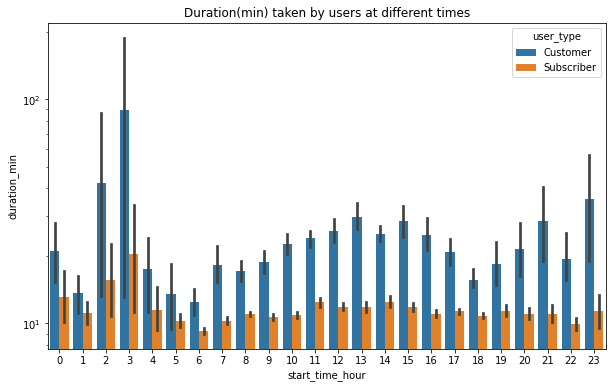

In [9]:
plt.figure(figsize=[10,6])
sb.barplot(data = bike, x = 'start_time_hour', y = 'duration_min', hue = 'user_type')
plt.legend(loc = 1, title = 'user_type')
plt.yscale('log')
plt.title('Duration(min) taken by users at different times');

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt